In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

# Cat and Dog Classification using ResNet-KAN Method

### Description of Kolmogorov-Arnold Network (KAN)

The paper: https://arxiv.org/abs/2404.19756

The Kolmogorov-Arnold Network (KAN) is a type of artificial neural network based on the Kolmogorov-Arnold Representation Theorem. This network has distinct characteristics in its structure and operation, differing from Multi-Layer Perceptrons (MLPs). KAN features the following:

1. **Kolmogorov-Arnold Representation Theorem**:
   
 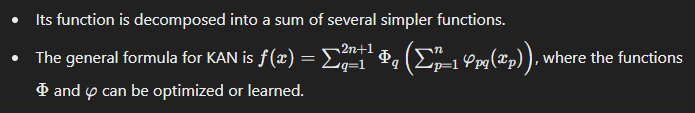
   
2. **Learnable Activations on Edges**:
   - Unlike MLPs, which have fixed activations on nodes, KAN has learnable activations on edges.

3. **Sum Operation on Nodes**:
   - KAN combines the results of several sum operations performed on nodes.

### Comparison Between KAN and MLP

#### Similarities
- **Both models** can be used for universal approximation of continuous functions.
- **Both models** consist of layers that can be combined to form deep networks.

#### Differences
1. **Activation Structure**:
   - **MLP**: Uses fixed activation functions on nodes.
   - **KAN**: Uses learnable activation functions on edges.

2. **Learning and Operation Locations**:
   - **MLP**: Learnable weights are on the edges between layers, with fixed activation functions.
   - **KAN**: The activation functions themselves are on the edges and learnable, with sum operations on nodes.

3. **Mathematical Formulas**:

   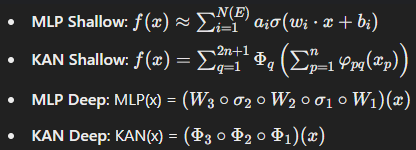

4. **Model Visualization**:
   - **MLP Shallow**: Depicted as a network with a single layer of fixed activations on nodes and weights on edges.
   - **KAN Shallow**: Depicted as a network with learnable functions on edges and sum operations on nodes.
   - **MLP Deep**: A network with multiple layers, each layer having weights and fixed activation functions.
   - **KAN Deep**: A network with multiple layers, but the learnable functions are on the edges.

### Conclusion
KAN and MLP are two different approaches to building neural networks with universal approximation capabilities. KAN offers higher flexibility in terms of having learnable activation functions on edges compared to MLPs, which use fixed activation functions on nodes. This makes KAN more adaptive in some cases, although with additional complexity in learning.



<p align="center">
  <a href="url"><img src="https://www.americanhumane.org/app/uploads/2016/08/shutterstock_162633491.jpg" align="middle" height="383" width="640" ></a>
</p>

In [26]:
!nvidia-smi

Fri Jun 21 02:49:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Checking the Directory Cat and Dog

In [27]:
!ls '/kaggle/input/dog-vs-cat-classification'

sample_submission.csv  test  train


## Spliting data training and validation

In [28]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Directory with our training cat pictures
train_cat_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/cats')
# Directory with our training dog pictures
train_dog_dir = os.path.join('/kaggle/input/dog-vs-cat-classification/train/train/dogs')

# Create output directories for training and validation data
output_base_dir = './split_data'
train_cat_output_dir = os.path.join(output_base_dir, 'train/cats')
train_dog_output_dir = os.path.join(output_base_dir, 'train/dogs')
validation_cat_output_dir = os.path.join(output_base_dir, 'validation/cats')
validation_dog_output_dir = os.path.join(output_base_dir, 'validation/dogs')

os.makedirs(train_cat_output_dir, exist_ok=True)
os.makedirs(train_dog_output_dir, exist_ok=True)
os.makedirs(validation_cat_output_dir, exist_ok=True)
os.makedirs(validation_dog_output_dir, exist_ok=True)

# List all cat and dog images
cat_images = os.listdir(train_cat_dir)
dog_images = os.listdir(train_dog_dir)

# Split 2500 images for validation, remaining 10000 for training
cat_train, cat_val = train_test_split(cat_images, test_size=2500, random_state=42)
dog_train, dog_val = train_test_split(dog_images, test_size=2500, random_state=42)

# Move cat images to the appropriate folders
for img in cat_train:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(train_cat_output_dir, img)
    shutil.copy(src, dst)

for img in cat_val:
    src = os.path.join(train_cat_dir, img)
    dst = os.path.join(validation_cat_output_dir, img)
    shutil.copy(src, dst)

# Move dog images to the appropriate folders
for img in dog_train:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(train_dog_output_dir, img)
    shutil.copy(src, dst)

for img in dog_val:
    src = os.path.join(train_dog_dir, img)
    dst = os.path.join(validation_dog_output_dir, img)
    shutil.copy(src, dst)

# Verify the split
print(f"Total training cat images: {len(os.listdir(train_cat_output_dir))}")
print(f"Total training dog images: {len(os.listdir(train_dog_output_dir))}")
print(f"Total validation cat images: {len(os.listdir(validation_cat_output_dir))}")
print(f"Total validation dog images: {len(os.listdir(validation_dog_output_dir))}")


Total training cat images: 10000
Total training dog images: 10000
Total validation cat images: 2500
Total validation dog images: 2500


In [29]:
!ls './split_data'

train  validation


In [30]:
train_cat_names = os.listdir(train_cat_output_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dog_output_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cat_output_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dog_output_dir)
print(validation_dog_names[:10])

['cat.1753.jpg', 'cat.5198.jpg', 'cat.6945.jpg', 'cat.9321.jpg', 'cat.8554.jpg', 'cat.5008.jpg', 'cat.8728.jpg', 'cat.8088.jpg', 'cat.8025.jpg', 'cat.11989.jpg']
['dog.9317.jpg', 'dog.9057.jpg', 'dog.7555.jpg', 'dog.597.jpg', 'dog.10433.jpg', 'dog.712.jpg', 'dog.8474.jpg', 'dog.3647.jpg', 'dog.11535.jpg', 'dog.3147.jpg']
['cat.2082.jpg', 'cat.10371.jpg', 'cat.8347.jpg', 'cat.8803.jpg', 'cat.7735.jpg', 'cat.3995.jpg', 'cat.9356.jpg', 'cat.1349.jpg', 'cat.3529.jpg', 'cat.8043.jpg']
['dog.1188.jpg', 'dog.11809.jpg', 'dog.8037.jpg', 'dog.5160.jpg', 'dog.5139.jpg', 'dog.6393.jpg', 'dog.327.jpg', 'dog.5992.jpg', 'dog.4944.jpg', 'dog.9907.jpg']


## Dataset exploration

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

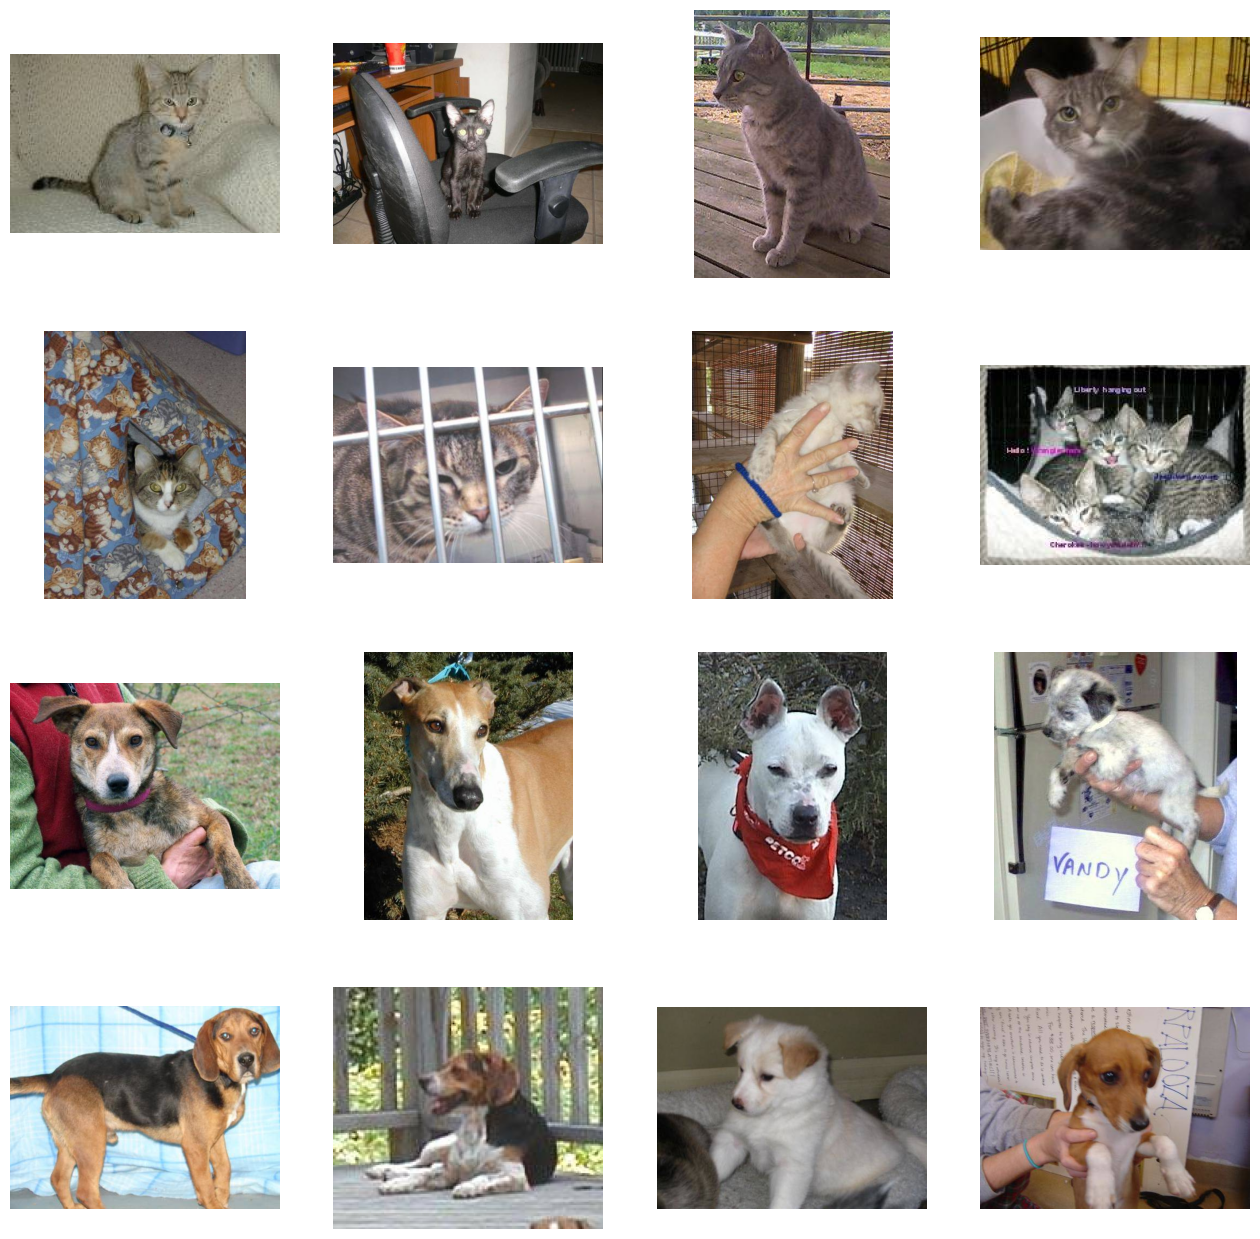

In [32]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pic = [os.path.join(train_cat_output_dir, fname)
                for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dog_output_dir, fname)
                for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Install library

In [33]:
!pip install -q torchsummary

## Import Library

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
from torchsummary import summary
from sklearn.metrics import classification_report
from torch.optim.lr_scheduler import OneCycleLR, ReduceLROnPlateau
from tqdm.notebook import tqdm
import warnings
import time

# Matikan semua peringatan
warnings.filterwarnings("ignore")

### 1. Definition of KANLinear
  - This definition follows the provided source and is used in the CNN-KAN model.

  <p align="center">
  <a href="url"><img src="https://www.marktechpost.com/wp-content/uploads/2024/05/Screenshot-2024-05-04-at-12.59.57-PM.png" align="middle" height="383" width="640" ></a>
</p>

KAN vs MLP Complexity (please correct if there are any errors):

Big O notation measures the time or space complexity of an algorithm in terms of its input. To compare the memory and performance requirements between the Kolmogorov-Arnold Network (KAN) and Multi-Layer Perceptron (MLP), we can look at the components that affect memory usage and computational time for both algorithms.

### Multi-Layer Perceptron (MLP)

MLP usually consists of several layers of neurons, where each neuron in one layer is connected to every neuron in the next layer.

- **Time Complexity (Training):** O(N * M * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M * L + N * F)
  - M: Number of neurons per layer
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Kolmogorov-Arnold Network (KAN)

KAN uses learnable activation functions at each edge and summation operations at nodes, adding complexity to the model.

- **Time Complexity (Training):** O(N * (M^2) * L * E)
  - N: Number of samples in the dataset
  - M: Number of neurons per layer (since the activation functions are learnable at each edge, there is additional complexity here)
  - L: Number of layers
  - E: Number of epochs

- **Space Complexity:** O(M^2 * L + N * F)
  - M: Number of neurons per layer (with learnable activation functions at each edge, memory requirements increase)
  - L: Number of layers
  - N: Number of samples in the dataset
  - F: Dimension of input features

### Conclusion

From the analysis above, it can be concluded that KAN has higher complexity compared to MLP in terms of both time and space.

1. **Time Complexity:**
   - MLP: O(N * M * L * E)
   - KAN: O(N * M^2 * L * E)

2. **Space Complexity:**
   - MLP: O(M * L + N * F)
   - KAN: O(M^2 * L + N * F)

It can be seen that KAN requires more memory (RAM) during training because it has learnable activation functions at each edge, which significantly increases the number of parameters that need to be stored and processed.

### Class KANLinier

[1] Reference: KAN: https://github.com/Blealtan/efficient-kan/blob/master/src/efficient_kan/kan.py

In [35]:
class KANLinear(nn.Module):
    def __init__(self, in_features, out_features, grid_size=5, spline_order=3, scale_noise=0.1, scale_base=1.0, scale_spline=1.0, enable_standalone_scale_spline=True, base_activation=nn.SiLU, grid_eps=0.02, grid_range=[-1, 1]):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = ((torch.arange(-spline_order, grid_size + spline_order + 1) * h + grid_range[0]).expand(in_features, -1).contiguous())
        self.register_buffer("grid", grid)

        self.base_weight = nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = nn.Parameter(torch.Tensor(out_features, in_features, grid_size + spline_order))
        if enable_standalone_scale_spline:
            self.spline_scaler = nn.Parameter(torch.Tensor(out_features, in_features))

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = ((torch.rand(self.grid_size + 1, self.in_features, self.out_features) - 1 / 2) * self.scale_noise / self.grid_size)
            self.spline_weight.data.copy_((self.scale_spline if not self.enable_standalone_scale_spline else 1.0) * self.curve2coeff(self.grid.T[self.spline_order : -self.spline_order], noise))
            if self.enable_standalone_scale_spline:
                nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        grid = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = ((x - grid[:, : -(k + 1)]) / (grid[:, k:-1] - grid[:, : -(k + 1)]) * bases[:, :, :-1]) + ((grid[:, k + 1 :] - x) / (grid[:, k + 1 :] - grid[:, 1:(-k)]) * bases[:, :, 1:])
        assert bases.size() == (x.size(0), self.in_features, self.grid_size + self.spline_order)
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)
        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)
        assert result.size() == (self.out_features, self.in_features, self.grid_size + self.spline_order)
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (self.spline_scaler.unsqueeze(-1) if self.enable_standalone_scale_spline else 1.0)

    def forward(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(self.b_splines(x).view(x.size(0), -1), self.scaled_spline_weight.view(self.out_features, -1))
        return base_output + spline_output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)
        splines = self.b_splines(x).permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff).permute(1, 0, 2)
        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[torch.linspace(0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device)]
        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (torch.arange(self.grid_size + 1, dtype=torch.float32, device=x.device).unsqueeze(1) * uniform_step + x_sorted[0] - margin)
        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.cat([grid[:1] - uniform_step * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1), grid, grid[-1:] + uniform_step * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1)], dim=0)
        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return regularize_activation * regularization_loss_activation + regularize_entropy * regularization_loss_entropy


## 2. Model CNNKAN

Reference: CNN-KAN: https://github.com/jakariaemon/CNN-KAN 

  # Basics CNN model for Cat and Dog Classifications with KANLinear
  
    class CNNKAN(nn.Module):
        def __init__(self):
            super(CNNKAN, self).__init__()
            self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  
            self.pool1 = nn.MaxPool2d(2)
            self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
            self.pool2 = nn.MaxPool2d(2)
            self.kan1 = KANLinear(64 * 8 * 8, 256)  
            self.kan2 = KANLinear(256, 100)

        def forward(self, x):
            x = F.selu(self.conv1(x))
            x = self.pool1(x)
            x = F.selu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(x.size(0), -1)
            x = self.kan1(x)
            x = self.kan2(x)
            return x

### Model VGG19-KAN 


In [37]:
class KANVGG19(nn.Module):
    def __init__(self, num_classes=1):  # Default is for ImageNet
        super(KANVGG19, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            KANLinear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            KANLinear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

## Model VGG16

In [ ]:
"""
# Define the model
class KANVGG16(nn.Module):
    def __init__(self, num_classes=1):  # For binary classification (cats and dogs)
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),  # Added Batch Normalization

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),  # Added Batch Normalization

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),  # Added Batch Normalization

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),  # Adjusted for input size 224x224
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
"""

## 3. Creating PyTorch Dataset and DataLoader
  - Use transformations and PyTorch DataLoader:

In [38]:
# Directory paths
train_dir = './split_data/train'
val_dir = './split_data/validation'

# Define transformations for the training data
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# For validation data, we resize to 224x224 and then just convert to tensor and normalize
transform_val = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

batch_size = 32

# Create the datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform_train)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform_val)

# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


## 4. Training dan Evaluasi Model
  - Bagian ini mendefinisikan loop training dan evaluasi model. Clear Gradients dan Kosongkan Cache

In [39]:
# Clear CUDA Cache
torch.cuda.empty_cache()

KANVGG19(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

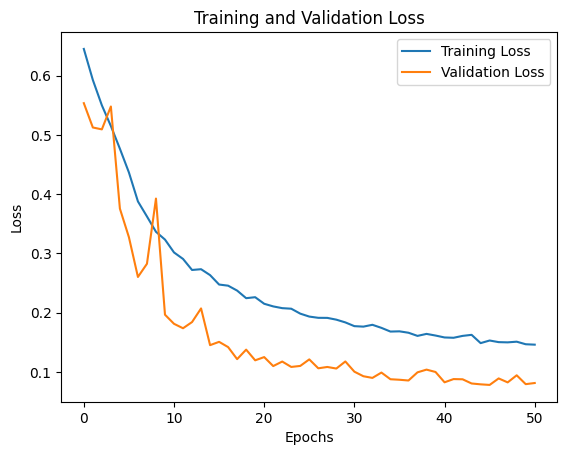

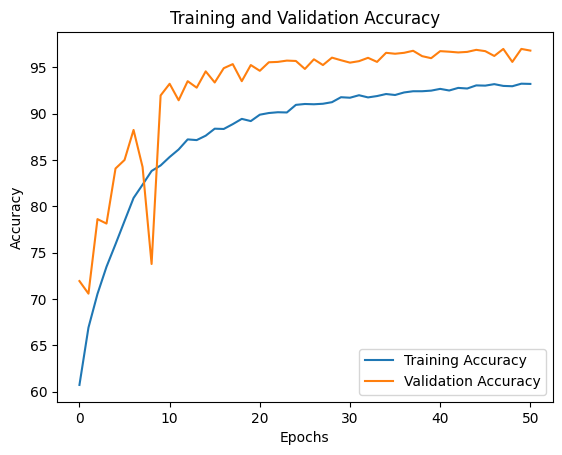

Epoch 1 duration: 0 hours, 13 minutes, 12 seconds
Epoch 2 duration: 0 hours, 13 minutes, 9 seconds
Epoch 3 duration: 0 hours, 13 minutes, 8 seconds
Epoch 4 duration: 0 hours, 13 minutes, 8 seconds
Epoch 5 duration: 0 hours, 13 minutes, 9 seconds
Epoch 6 duration: 0 hours, 13 minutes, 9 seconds
Epoch 7 duration: 0 hours, 13 minutes, 11 seconds
Epoch 8 duration: 0 hours, 13 minutes, 8 seconds
Epoch 9 duration: 0 hours, 13 minutes, 9 seconds
Epoch 10 duration: 0 hours, 13 minutes, 7 seconds
Epoch 11 duration: 0 hours, 13 minutes, 6 seconds
Epoch 12 duration: 0 hours, 13 minutes, 7 seconds
Epoch 13 duration: 0 hours, 13 minutes, 5 seconds
Epoch 14 duration: 0 hours, 13 minutes, 2 seconds
Epoch 15 duration: 0 hours, 13 minutes, 2 seconds
Epoch 16 duration: 0 hours, 13 minutes, 2 seconds
Epoch 17 duration: 0 hours, 13 minutes, 2 seconds
Epoch 18 duration: 0 hours, 13 minutes, 2 seconds
Epoch 19 duration: 0 hours, 13 minutes, 1 seconds
Epoch 20 duration: 0 hours, 13 minutes, 2 seconds
Epoch 2

In [40]:
epoch_number = 100

# Model definition
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = KANVGG19().to(device)
print(model)
summary(model, input_size=(3, 224, 224))

# Use DataParallel if using more than one GPU
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# Print model parameter details
def print_parameter_details(model):
    for name, param in model.named_parameters():
        print(f"{name}: {param.size()} {'requires_grad' if param.requires_grad else 'frozen'}")

print_parameter_details(model)

# Visualize KAN parameters
def visualize_kan_parameters(kan_layer, layer_name):
    base_weights = kan_layer.base_weight.data.cpu().numpy()
    plt.hist(base_weights.ravel(), bins=50)
    plt.title(f"Distribution of Base Weights - {layer_name}")
    plt.xlabel("Weight Value")
    plt.ylabel("Frequency")
    plt.show()
    if hasattr(kan_layer, 'spline_weight'):
        spline_weights = kan_layer.spline_weight.data.cpu().numpy()
        plt.hist(spline_weights.ravel(), bins=50)
        plt.title(f"Distribution of Spline Weights - {layer_name}")
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.show()

# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.AdamW(model.parameters(), lr=0.0001)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001, steps_per_epoch=len(train_loader), epochs=epoch_number)
# scheduler = ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

# Training function
def train(model, train_loader, criterion, optimizer, device, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        if batch_idx % 10 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(inputs)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

        # Clear CUDA cache
        torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return running_loss / len(train_loader), accuracy

# Validation function with batch progress display
def validate(model, val_loader, criterion, device, epoch):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(val_loader):
            inputs, labels = inputs.to(device), labels.to(device).float().view(-1, 1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels.squeeze()).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.squeeze().cpu().numpy())

            if batch_idx % 10 == 0:
                print(f'Validation Epoch: {epoch} [{batch_idx * len(inputs)}/{len(val_loader.dataset)} ({100. * batch_idx / len(val_loader):.0f}%)]\tLoss: {loss.item():.6f}')

            # Clear CUDA cache
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    print(classification_report(all_labels, all_predictions))
    return val_loss / len(val_loader), accuracy

# Early stopping
best_val_loss = float('inf')
patience = 5
patience_counter = 0

# Lists to store loss and accuracy values
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Timing variables
epoch_times = []
total_start_time = time.time()

# Function to convert seconds to hours, minutes, seconds
def convert_seconds(seconds):
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    seconds = int(seconds % 60)
    return hours, minutes, seconds

# Input jumlah epoch
jumlah_epoch = epoch_number
for epoch in range(jumlah_epoch):
    epoch_start_time = time.time()
    
    train_loss, train_accuracy = train(model, train_loader, criterion, optimizer, device, epoch)
    val_loss, val_accuracy = validate(model, val_loader, criterion, device, epoch)

    # Save losses and accuracy
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{jumlah_epoch}, Train Loss: {train_loss:.6f}, Train Accuracy: {train_accuracy:.2f}%, Validation Loss: {val_loss:.6f}, Validation Accuracy: {val_accuracy:.2f}%")
    scheduler.step(val_loss)

    # Calculate epoch time
    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time
    epoch_times.append(epoch_duration)
    hours, minutes, seconds = convert_seconds(epoch_duration)
    print(f"Epoch {epoch+1} duration: {hours} hours, {minutes} minutes, {seconds} seconds")
    
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_weights_KAN.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# Calculate total training time
total_end_time = time.time()
total_duration = total_end_time - total_start_time
total_hours, total_minutes, total_seconds = convert_seconds(total_duration)
print(f"Total training time: {total_hours} hours, {total_minutes} minutes, {total_seconds} seconds")

# Load the best model weights
model.load_state_dict(torch.load('best_model_weights_KAN.pth'))

# Evaluate model on validation set
def test(model, val_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Clear CUDA cache
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, val_loader, device)
print(f'Validation Accuracy: {accuracy:.2f}%')

# Plot training and validation loss
def plot_loss(train_losses, val_losses):
    plt.figure()
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Plot training and validation accuracy
def plot_accuracy(train_accuracies, val_accuracies):
    plt.figure()
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Plot the losses and accuracy
plot_loss(train_losses, val_losses)
plot_accuracy(train_accuracies, val_accuracies)

# Print epoch durations
for i, epoch_time in enumerate(epoch_times):
    hours, minutes, seconds = convert_seconds(epoch_time)
    print(f"Epoch {i+1} duration: {hours} hours, {minutes} minutes, {seconds} seconds")

## 5. Evaluasi Model pada Data Test

In [ ]:
"""
# Create the test dataset and loader
test_dir = '/tmp/test'
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

def test(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            # Kosongkan cache CUDA
            torch.cuda.empty_cache()

    accuracy = 100 * correct / total
    return accuracy

accuracy = test(model, test_loader, device)
print(f'Test Accuracy: {accuracy}%')
"""

## 6. Plot ROC Curve

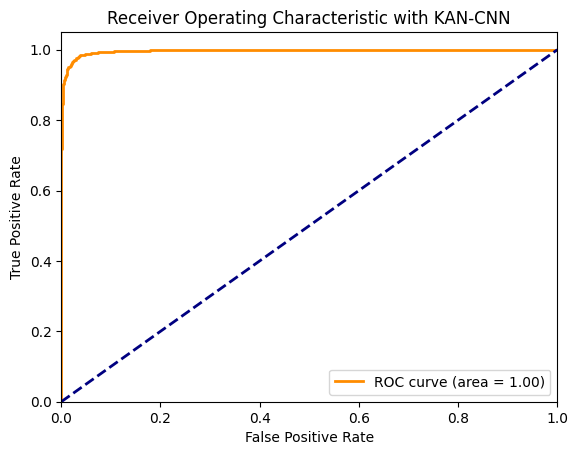

 
Accuracy: 0.9674
Precision: 0.9855
Recall: 0.9488
F1 Score: 0.9668
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97      2500
     Class 1       0.99      0.95      0.97      2500

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, precision_score, recall_score, f1_score
import torch

# Function to calculate predictions and true labels
def get_predictions_and_labels(model, val_loader, device):
    model.eval()
    preds = []
    true_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds.extend(outputs.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(preds), np.array(true_labels)

# Function to plot ROC Curve
def plot_roc_curve(true_labels, preds):
    fpr, tpr, _ = roc_curve(true_labels, preds)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic with KAN-CNN')
    plt.legend(loc="lower right")
    plt.show()

# Function to calculate and print classification metrics
def print_classification_metrics(true_labels, preds):
    preds_binary = (preds >= 0.5).astype(int) # Threshold for binary classification
    accuracy = accuracy_score(true_labels, preds_binary)
    precision = precision_score(true_labels, preds_binary)
    recall = recall_score(true_labels, preds_binary)
    f1 = f1_score(true_labels, preds_binary)
    report = classification_report(true_labels, preds_binary, target_names=['Class 0', 'Class 1'])

    print(" ")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Classification Report:')
    print(report)

# Assuming you have your model, val_loader, and device already defined
# Example usage
preds, true_labels = get_predictions_and_labels(model, val_loader, device)
plot_roc_curve(true_labels, preds)
print_classification_metrics(true_labels, preds)


## Making Prediction

Code Colab: https://colab.research.google.com/drive/1h-a2_EvDZYKawcH847a3kj7gyujWsQPR?usp=sharing

In [ ]:
# Tentukan device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definisikan transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Fungsi untuk memuat dan memproses gambar
def load_and_preprocess_image(img_bytes):
    img = Image.open(BytesIO(img_bytes)).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)
    return img, img_tensor

# Define the model
class KANVGG16(nn.Module):
    def __init__(self, num_classes=1):  # For binary classification (cats and dogs)
        super(KANVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),  # Added Batch Normalization

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(128),  # Added Batch Normalization

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(256),  # Added Batch Normalization

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(512),  # Added Batch Normalization
        )
        self.classifier = nn.Sequential(
            KANLinear(512 * 7 * 7, 2048),  # Adjusted for input size 224x224
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),  # Increased Dropout
            KANLinear(2048, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Membuat instance model
model = KANVGG16().to(device)

# Memuat state_dict dari file dengan penyesuaian nama parameter
def load_state_dict_adjusted(model, state_dict_path):
    state_dict = torch.load(state_dict_path, map_location=device)
    new_state_dict = {}
    for k, v in state_dict.items():
        if k.startswith('module.'):
            new_state_dict[k[len('module.'):]] = v
        else:
            new_state_dict[k] = v
    model.load_state_dict(new_state_dict)

model_path = '/kaggle/working/best_model_weights_KAN.pth'  # Ganti dengan path model Anda
load_state_dict_adjusted(model, model_path)

# Fungsi untuk melakukan prediksi dan menampilkan gambar
def predict_and_display(img, img_tensor):
    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        prob = torch.sigmoid(output).cpu().numpy().flatten()
    plt.imshow(np.array(img))
    plt.axis('off')
    prediction_text = f"Probabilitas: {prob[0]:.4f}\n"
    prediction_text += "This is a cat" if prob[0] < 0.5 else "This is a dog"
    plt.title(prediction_text)
    plt.show()

# Fungsi untuk menangani pengunggahan file
def handle_upload():
    uploaded = files.upload()
    for name, data in uploaded.items():
        img, img_tensor = load_and_preprocess_image(data)
        predict_and_display(img, img_tensor)

# Memanggil fungsi untuk menangani pengunggahan file
handle_upload()

## Result prediction in colab

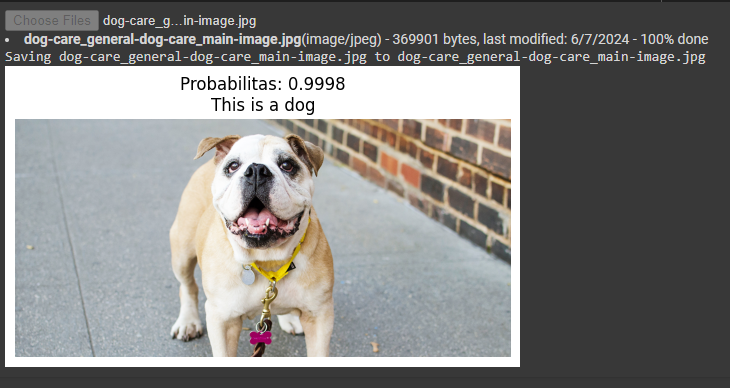

## Download the Model

In [ ]:
!cd /kaggle/working/

In [ ]:
!ls

In [ ]:
from IPython.display import FileLink 
FileLink(r'best_model_weights_KAN.pth')